<a href="https://colab.research.google.com/github/komal-06-rathore/Face_count/blob/main/face_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


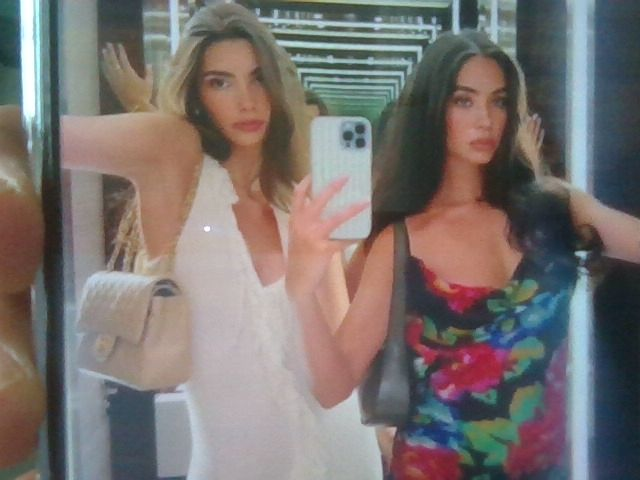

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow

[(438, 74) (525, 160)] 1
[(198, 54) (285, 141)] 2


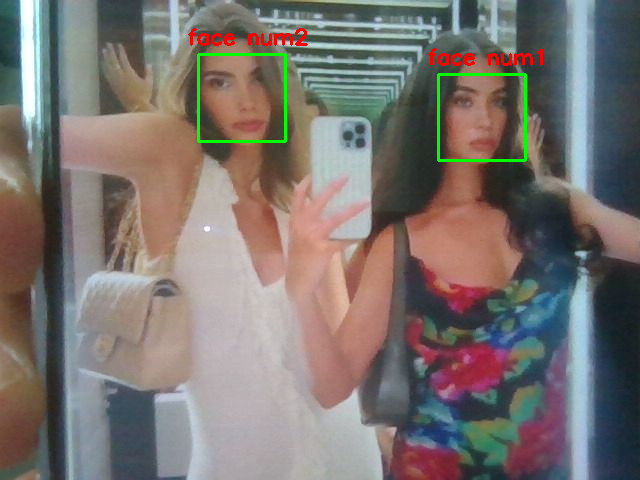

In [ ]:
# Import required libraries
import cv2
import numpy as np
import dlib

# Detect the coordinates
detector = dlib.get_frontal_face_detector()

# Capture frames continuously
while True:
    frame = cv2.imread('photo.jpg')
    # RGB to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    # Iterator to count faces
    i = 0
    for face in faces:

        # Get the coordinates of faces
        x, y = face.left(), face.top()
        x1, y1 = face.right(), face.bottom()
        cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)

        # Increment iterator for each face in faces
        i = i+1

        # Display the box and faces
        cv2.putText(frame, 'face num'+str(i), (x-10, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        print(face, i)

    # Display the resulting frame
    cv2_imshow(frame)


    if cv2.waitKey(1):
        break


# Release the capture and destroy the windows
# cap.release()
cv2.destroyAllWindows()